In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
months = [f"{x:02d}" for x in range(1,13)]
years = [f"{x:04d}" for x in range(300,301)]
i =0
result = np.zeros((12,601,3600))

In [3]:
for yy in years:
    for mm in months:

        data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/ice300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.cice.h.'+yy+'-'+mm +'.dvidtt.nc')
        plotvar = data.variables['dvidtt'][0,:,:]
        lont = data.variables['TLON']
        latt = data.variables['TLAT']
        #plotvar = plotvar[247:365,800:1100]
        #plotvar[plotvar == -1.0] = np.nan
        #aveplot = np.nanmean(plotvar,axis=1)
        #aveplot = np.nanmean(aveplot,axis=0)
        result[i,:,:] = plotvar
        
        i = i + 1
#********************************************************************

In [4]:
data

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02
    contents: Diagnostic and Prognostic Variables
    source: sea ice model: Community Ice Code (CICE)
    comment: All years have exactly 365 days
    comment2: File written on model date  3010101
    comment3: seconds elapsed into model date:      0
    conventions: CF-1.0
    history: Thu Mar  4 16:26:45 2021: ncks -v dvidtt -d nj,0,600 -d ni,0,3599 B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.cice.h.0300-12.nc B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.cice.h.0300-12.dvidtt.nc
This dataset was created on 2019-10-29 at 13:55
    NCO: netCDF Operators version 4.8.1 (Homepage = http://nco.sf.net, Code = http://github.com/nco/nco)
    dimensions(sizes): nj(601), ni(3600), time(1), nvertices(4), d2(2)
    variables(dimensions): float32 TLAT(nj,ni), float32 TLON(nj,ni), float32 dvidtt(time,nj,ni), float32 latt_bounds(nj,ni,nvertices),

In [5]:
aveplot = np.nanmean(result,axis=0)

In [6]:
aveplot.shape

(601, 3600)

In [7]:
lont = lont[:,:]
latt = latt[:,:]

/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: The following kwargs were not used by contour: 'spacing'
/scratch/user/xiliangdiao/.conda/envs/DIAO/lib/python3.6/site-packages/ipykernel_launcher.py:31: UserWarning: No contour levels were found within the data range.
findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


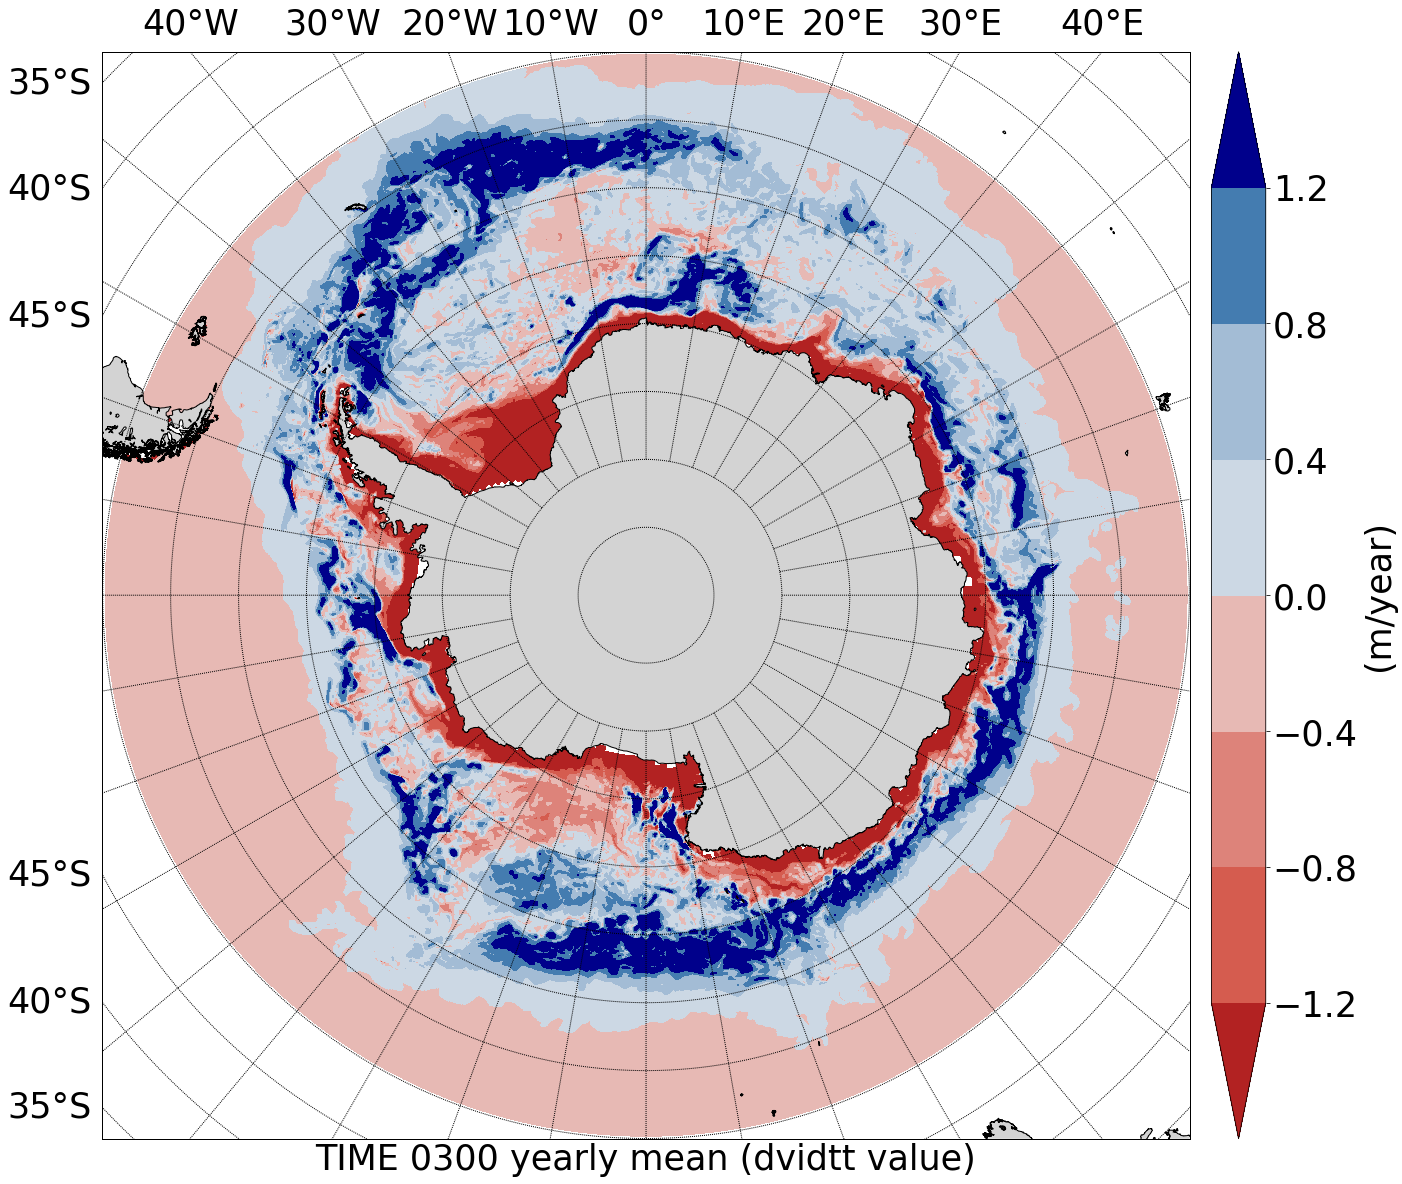

In [8]:
nice_cmap=sns.diverging_palette(245, 15, n=13,as_cmap=True)
#nice_cmap=sns.diverging_palette(245, 10, n=10,as_cmap=True)
#lev_cmap = nice_cmap([1,30,50,70,80,100,130,140,150,170,190,210,230,240]) 
lev_cmap = nice_cmap([240,230,210,190,170,140,130,100,80,70,50,30,1])
new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
nice_levels = [-1.2,-0.8,-0.4,0,0.4,0.8,1.2]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#********************************************************************

plt.figure(figsize=(25,20))
my_font = {'fontname':'Cambria', 'size':'35'}
# set the mapping range
map = Basemap(projection='aeqd', lat_0 = -90, lon_0 = 0,area_thresh = 100,\
                     width = 8900000,height = 8900000,resolution ='h') 
#############################################
##width = 2500000,height = 1500000
##lat_0 = -65, lon_0 = 0
#############################################
map.drawcoastlines()
map.fillcontinents(color = 'lightgrey')
map.drawmapboundary(color='black')
 
map.drawparallels(np.arange(-90,91,5),labels=[1,0,0,0],**my_font)
map.drawmeridians(np.arange(-180,180,10),labels=[0,0,1,0],**my_font)

x,y=map(lont,latt)
CP = map.contourf(x,y,-aveplot*365/100*1000/917,levels = nice_levels,cmap = new_cmap,norm =norm,spacing = 'uniform',extend='both')
CP.cmap.set_over('darkblue')
CP.cmap.set_under('firebrick')

CS=map.contour(x,y,plotvar,[700],colors = 'r', linestyles = 'solid',linewidths=1)
plt.clabel(CS, inline=0.1, fontsize=35)
#cbar =map.colorbar(CP,extend='both',extendfrac='auto',extendrect='True')
cbar =map.colorbar(CP,extendfrac='auto',ticks=nice_levels)
#cbar.minorticks_on()
cbar.ax.tick_params(labelsize=35) 
cbar.set_label('(m/year)', **my_font)
plt.xlabel("TIME 0300 yearly mean (dvidtt value)",**my_font)
plt.savefig("300year.png")

In [9]:
aveplot[aveplot >  1000] = np.nan

In [10]:
aveplot[:,0]

array([            nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan,
                   nan,  

In [11]:
np.nanmean(aveplot)

0.035990709452970525